In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.linear_model import LassoCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


In [3]:
df = pd.read_csv("winequality-white - winequality-white.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
print("Unique wine quality scores:", df['quality'].unique())
print("Quality value counts:\n", df['quality'].value_counts())

Unique wine quality scores: [6 5 7 8 4 3 9]
Quality value counts:
 quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


In [8]:
print("Skewness:\n", df.skew(numeric_only=True))
print("Kurtosis:\n", df.kurt(numeric_only=True))

Skewness:
 fixed acidity           0.647751
volatile acidity        1.576980
citric acid             1.281920
residual sugar          1.077094
chlorides               5.023331
free sulfur dioxide     1.406745
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64
Kurtosis:
 fixed acidity            2.172178
volatile acidity         5.091626
citric acid              6.174901
residual sugar           3.469820
chlorides               37.564600
free sulfur dioxide     11.466342
total sulfur dioxide     0.571853
density                  9.793807
pH                       0.530775
sulphates                1.590930
alcohol                 -0.698425
quality                  0.216526
dtype: float64


C:\Users\ZAIN PC\AppData\Local\Temp\ipykernel_13464\2757017940.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='Set2')


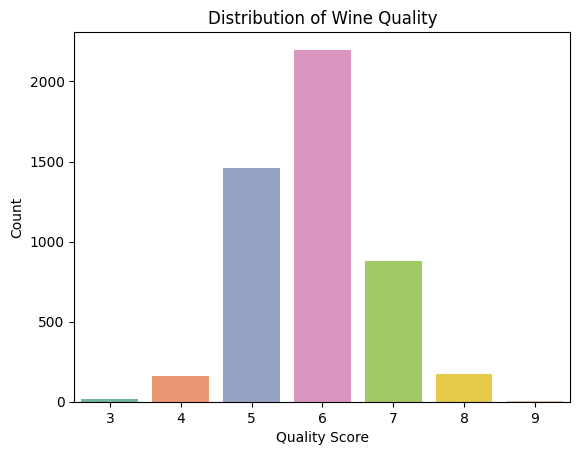

In [11]:
sns.countplot(x='quality', data=df, palette='Set2')
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()

C:\Users\ZAIN PC\AppData\Local\Temp\ipykernel_13464\3753273868.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='Set3')
C:\Users\ZAIN PC\AppData\Local\Temp\ipykernel_13464\3753273868.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='Set3')
C:\Users\ZAIN PC\AppData\Local\Temp\ipykernel_13464\3753273868.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='Set3')
C:\Users\ZAIN PC\AppData\Local\Temp\ipykernel_13464\3753273868.py:4

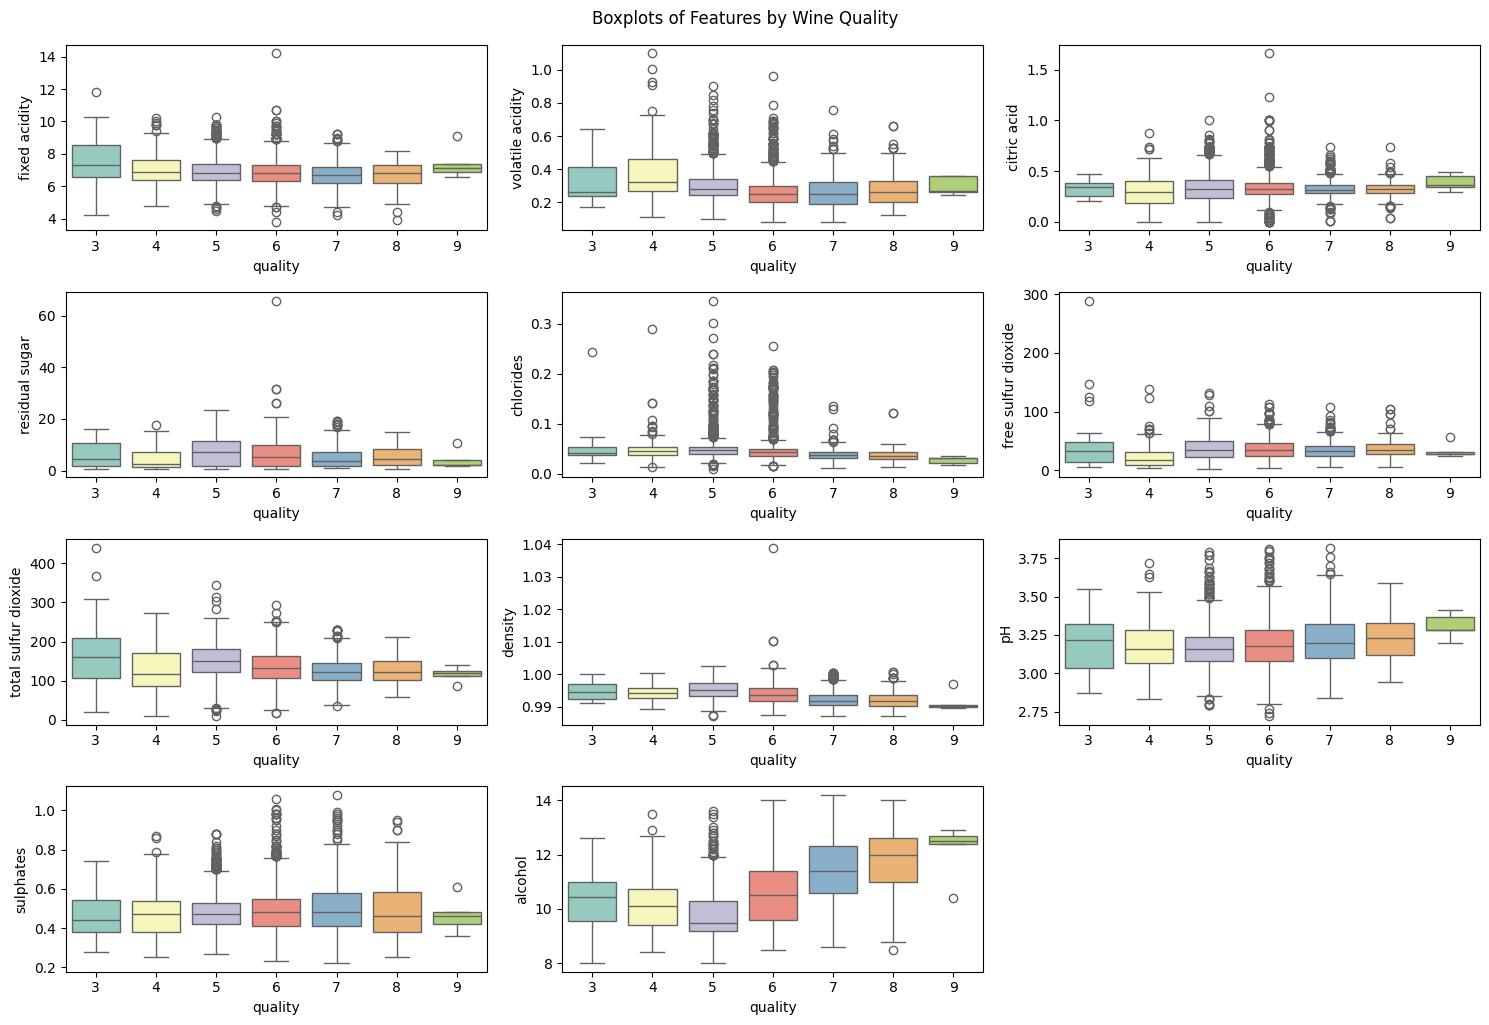

In [9]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='quality', y=col, data=df, palette='Set3')
    plt.tight_layout()
plt.suptitle("Boxplots of Features by Wine Quality", y=1.02)
plt.show()

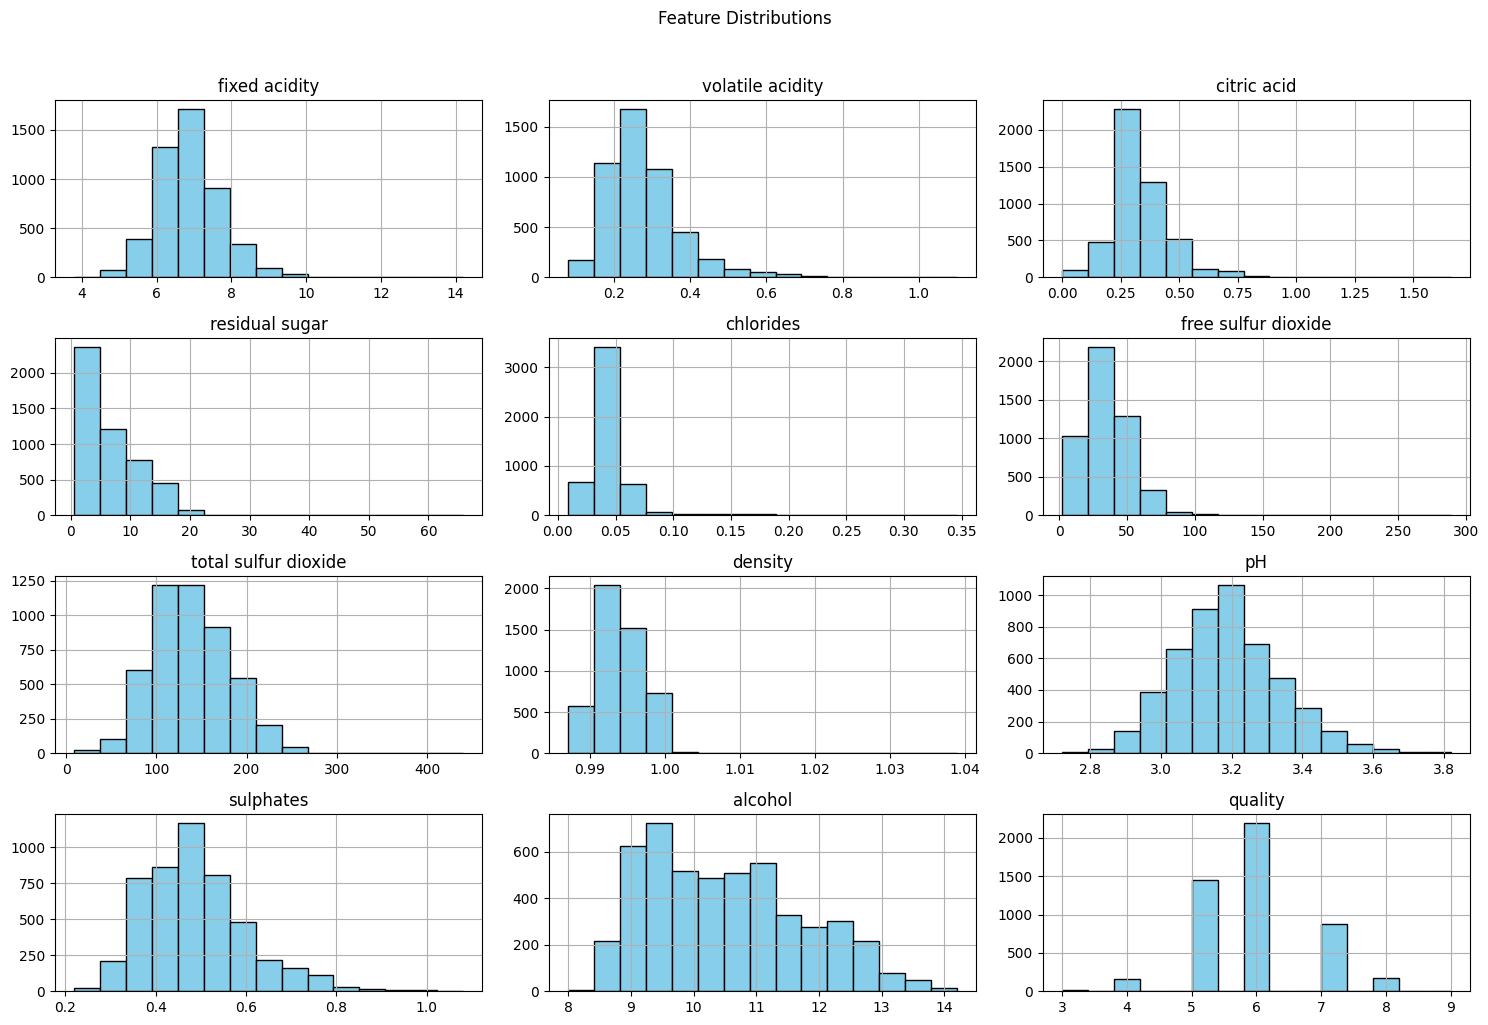

In [10]:
df.hist(bins=15, figsize=(15, 10), layout=(4, 3), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()

In [5]:
# Normailization
features = df.drop(columns=['quality'])  
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['quality'] = df['quality']

In [6]:
# Split dataset into training and testing sets
X = df_scaled.drop(columns=['quality'])
y = df_scaled['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Low Variance Filter
var_thresh = VarianceThreshold(threshold=0.01) 
X_train_var = var_thresh.fit_transform(X_train)
removed_features = X_train.columns[~var_thresh.get_support()]
print("Removed features due to low variance:", removed_features.tolist())

Removed features due to low variance: []


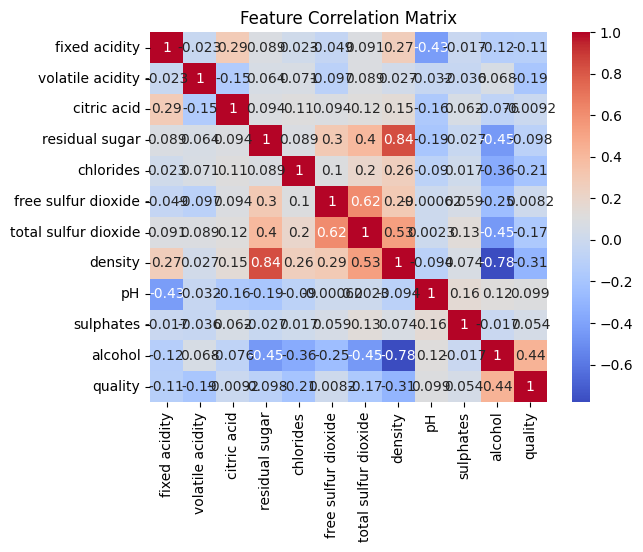

In [8]:
# Pearson’s Correlation
corr_matrix = df_scaled.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [9]:
target_correlation = corr_matrix['quality'].drop('quality')
high_corr_features = target_correlation[abs(target_correlation) > 0.1].index.tolist()
X_train_corr = X_train[high_corr_features]
print("Selected features based on correlation:", high_corr_features)

Selected features based on correlation: ['fixed acidity', 'volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'alcohol']


In [10]:
mi_scores = mutual_info_classif(X_train, y_train)
mi_scores_series = pd.Series(mi_scores, index=X_train.columns)
mi_scores_series.sort_values(ascending=False, inplace=True)
top_mi_features = mi_scores_series.head(5).index.tolist()
print("Top 5 features by mutual information:", top_mi_features)

Top 5 features by mutual information: ['density', 'alcohol', 'residual sugar', 'total sulfur dioxide', 'volatile acidity']


In [11]:
# Forward Feature Selection
from sklearn.feature_selection import SequentialFeatureSelector
clf = RandomForestClassifier(random_state=42)
sfs = SequentialFeatureSelector(clf, n_features_to_select='auto', direction='forward')
sfs.fit(X_train, y_train)
selected_forward_features = X_train.columns[sfs.get_support()].tolist()
print("Selected features using forward selection:", selected_forward_features)

Selected features using forward selection: ['volatile acidity', 'residual sugar', 'density', 'pH', 'alcohol']


In [11]:
# Backward Feature Elimination
sfs_backward = SequentialFeatureSelector(clf, n_features_to_select='auto', direction='backward')
sfs_backward.fit(X_train, y_train)
selected_backward_features = X_train.columns[sfs_backward.get_support()].tolist()
print("Selected features using backward elimination:", selected_backward_features)

Selected features using backward elimination: ['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']
